<a href="https://colab.research.google.com/github/Merlinvensiya/noise-prediction/blob/main/volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [3]:
df = pd.read_csv('/content/full dataset.csv')
df.head()

,Leq( Avg),total vehicles,2W,3W,4w,HV,Distance of residents from the road,Age,Health Hazards,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,80.65,777,557,60,137,23,60.50,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93.75,862,601,82,152,27,91.80,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86.15,710,512,64,113,21,38.08,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98.65,809,610,55,124,20,123.92,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91.45,786,555,69,135,27,353.87,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


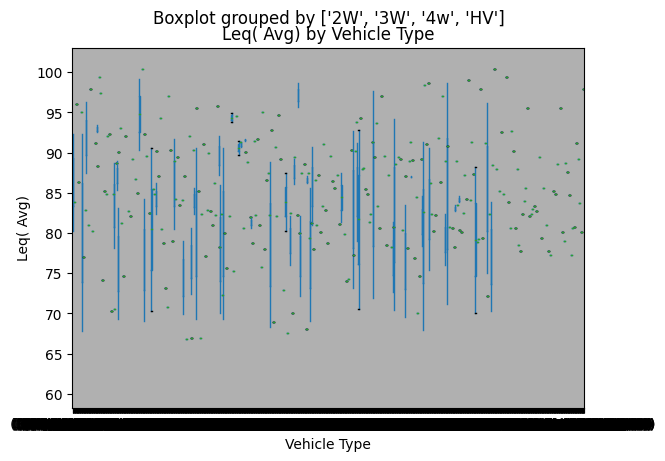

In [53]:
# @title Leq( Avg) by Vehicle Type

import matplotlib.pyplot as plt
df.boxplot(column='Leq( Avg)', by=['2W', '3W', '4w', 'HV'])
plt.xlabel('Vehicle Type')
plt.ylabel('Leq( Avg)')
_ = plt.title('Leq( Avg) by Vehicle Type')

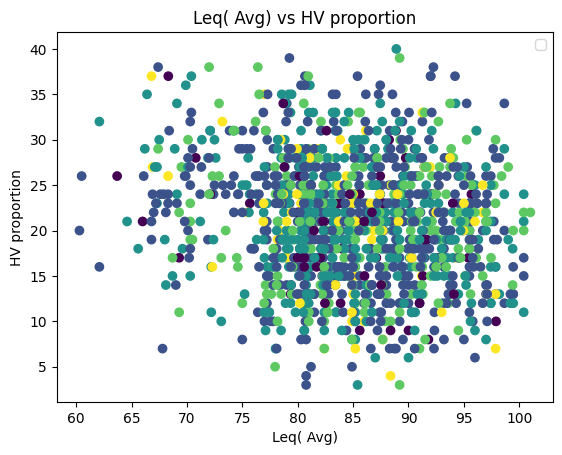

In [51]:
# @title Leq( Avg) vs HV proportion

import matplotlib.pyplot as plt
plt.scatter(df['Leq( Avg)'], df['HV'], c=df['Age'])
plt.xlabel('Leq( Avg)')
plt.ylabel('HV proportion')
_ = plt.title('Leq( Avg) vs HV proportion')
plt.legend()

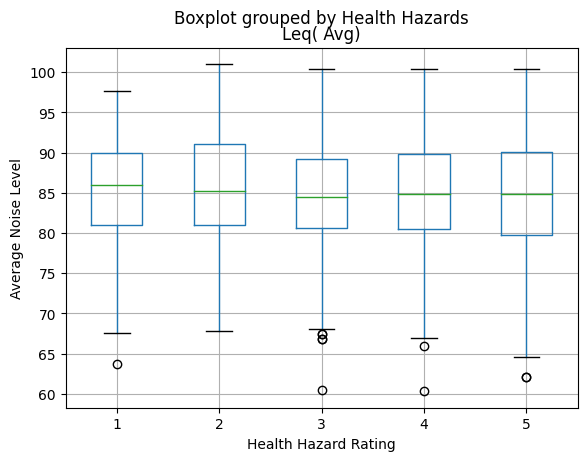

In [6]:
# @title Average Noise Level by Health Hazard Rating

import matplotlib.pyplot as plt
df.boxplot(column='Leq( Avg)', by='Health Hazards')
plt.xlabel('Health Hazard Rating')
_ = plt.ylabel('Average Noise Level')

In [7]:
df.shape

(1370, 20)

In [8]:
df.info

<bound method DataFrame.info of       Leq( Avg)  total vehicles   2W  3W   4w  HV  \
0         80.65             777  557  60  137  23   
1         93.75             862  601  82  152  27   
2         86.15             710  512  64  113  21   
3         98.65             809  610  55  124  20   
4         91.45             786  555  69  135  27   
...         ...             ...  ...  ..  ...  ..   
1365      79.20             796  596  54  111  35   
1366      83.53             779  593  45  110  31   
1367      82.90             801  591  59  124  27   
1368      88.00             776  565  62  119  30   
1369      92.72             822  609  52  135  26   

      Distance of residents from the road  Age  Health Hazards  Unnamed: 9  \
0                                   60.50    3               5         NaN   
1                                   91.80    4               3         NaN   
2                                   38.08    1               5         NaN   
3                                  123.92    2               4         NaN   
4                                  353.87    2               3         NaN   
...                                   ...  ...             ...         ...   
1365                               278.07    3               5         NaN   
1366                                92.13    2               4         NaN   
1367                               653.36    2               5         NaN   
1368                               280.32    3               5         NaN   
1369                                94.38    2               4         NaN   

      Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0             NaN          NaN          NaN          NaN          NaN   
1             NaN          NaN          NaN          NaN          NaN   
2             NaN          NaN          NaN          NaN          NaN   
3             NaN          NaN          NaN          NaN          NaN   
4             NaN          NaN          NaN          NaN          NaN   
...           ...          ...          ...          ...          ...   
1365          NaN          NaN          NaN          NaN          NaN   
1366          NaN          NaN          NaN          NaN          NaN   
1367          NaN          NaN          NaN          NaN          NaN   
1368          NaN          NaN          NaN          NaN          NaN   
1369          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  
0             NaN          NaN          NaN          NaN          NaN  
1             NaN          NaN          NaN          NaN          NaN  
2             NaN          NaN          NaN          NaN          NaN  
3             NaN          NaN          NaN          NaN          NaN  
4             NaN          NaN          NaN          NaN          NaN  
...           ...          ...          ...          ...          ...  
1365          NaN          NaN          NaN          NaN          NaN  
1366          NaN          NaN          NaN          NaN          NaN  
1367          NaN          NaN          NaN          NaN          NaN  
1368          NaN          NaN          NaN          NaN          NaN  
1369          NaN          NaN          NaN          NaN          NaN  

[1370 rows x 20 columns]>

In [9]:
df.describe()

,Leq( Avg),total vehicles,2W,3W,4w,HV,Distance of residents from the road,Age,Health Hazards,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,84.859384,1081.397080,779.765693,112.036496,168.662044,20.932847,109.278423,2.795620,3.702190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.287672,704.946013,529.443900,75.776170,126.646585,6.632469,184.317265,0.995525,1.215463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,60.300000,499.000000,375.000000,38.000000,54.000000,3.000000,4.760000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,80.550000,748.000000,531.000000,60.000000,109.000000,16.000000,13.714500,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,84.900000,807.000000,588.000000,74.000000,126.000000,21.000000,34.770000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90.100000,869.000000,613.000000,154.000000,148.000000,25.000000,105.950000,3.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,101.000000,3290.000000,2284.000000,343.000000,647.000000,40.000000,998.860000,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Leq( Avg)                                 0
total vehicles                            0
2W                                        0
3W                                        0
4w                                        0
HV                                        0
Distance of residents from the road       0
Age                                       0
Health Hazards                            0
Unnamed: 9                             1370
Unnamed: 10                            1370
Unnamed: 11                            1370
Unnamed: 12                            1370
Unnamed: 13                            1370
Unnamed: 14                            1370
Unnamed: 15                            1370
Unnamed: 16                            1370
Unnamed: 17                            1370
Unnamed: 18                            1370
Unnamed: 19                            1370
dtype: int64

In [15]:
df['Health Hazards'].value_counts()
df['Leq( Avg)'].value_counts()
df['Distance of residents from the road'].value_counts()

16.750    3
6.620     3
11.620    3
6.160     3
72.050    3
         ..
41.751    1
23.021    1
16.081    1
52.511    1
94.380    1
Name: Distance of residents from the road, Length: 1286, dtype: int64

In [16]:
df['Health Hazards'].value_counts()/df.shape[0]*100
df['Leq( Avg)'].value_counts()/df.shape[0]*100
df['Distance of residents from the road'].value_counts()/df.shape[0]*100

16.750    0.218978
6.620     0.218978
11.620    0.218978
6.160     0.218978
72.050    0.218978
            ...   
41.751    0.072993
23.021    0.072993
16.081    0.072993
52.511    0.072993
94.380    0.072993
Name: Distance of residents from the road, Length: 1286, dtype: float64

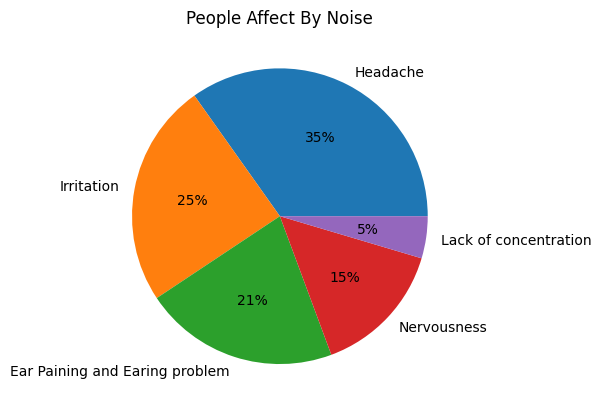

In [17]:
labels = ['Headache','Irritation','Ear Paining and Earing problem','Nervousness','Lack of concentration']
values = df['Health Hazards'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('People Affect By Noise')
plt.show()

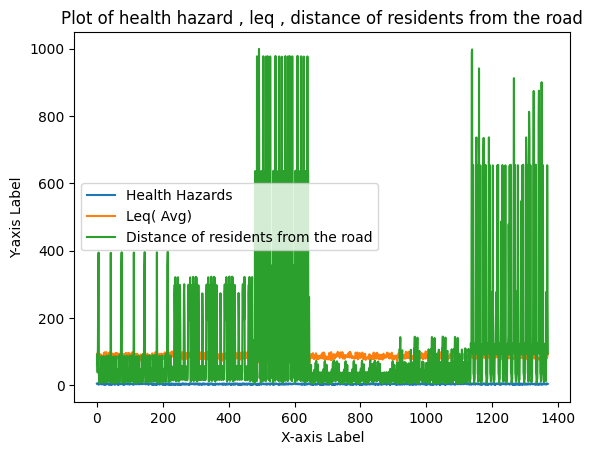

In [18]:
attribute1 = df['Health Hazards']
attribute2 = df['Leq( Avg)']
attribute3 = df['Distance of residents from the road']
fig, ax = plt.subplots()
ax.plot(attribute1, label='Health Hazards')
ax.plot(attribute2, label='Leq( Avg)')
ax.plot(attribute3, label='Distance of residents from the road')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Plot of health hazard , leq , distance of residents from the road')
ax.legend()
plt.show()

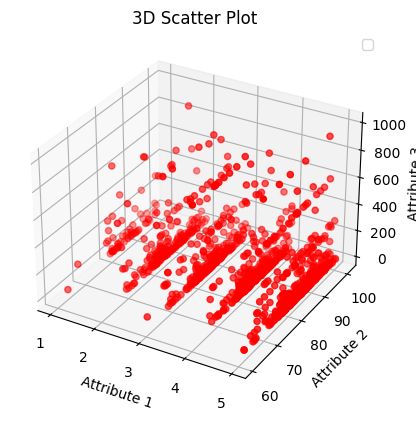

In [19]:
attribute1 = df['Health Hazards']
attribute2 = df['Leq( Avg)']
attribute3 = df['Distance of residents from the road']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(attribute1, attribute2, attribute3, c='r', marker='o')
ax.set_xlabel('Attribute 1')
ax.set_ylabel('Attribute 2')
ax.set_zlabel('Attribute 3')
ax.set_title('3D Scatter Plot')
ax.legend()
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [24]:
# Load the data from CSV
data = pd.read_csv('/content/full dataset.csv')

# Encode the 'Place' column
label_encoder = LabelEncoder()



# Features and target variables
X = data[['total vehicles']]
y_noise = data['Leq( Avg)']
y_hazard = data['Health Hazards']
y_distance = data['Distance of residents from the road']

# Split the data into training and testing sets
X_train, X_test, y_train_noise, y_test_noise = train_test_split(X, y_noise, test_size=0.2, random_state=42)
X_train, X_test, y_train_hazard, y_test_hazard = train_test_split(X, y_hazard, test_size=0.2, random_state=42)
X_train, X_test, y_train_distance, y_test_distance = train_test_split(X, y_distance, test_size=0.2, random_state=42)


In [ ]:
print(X_train.isnull().sum())

total vehicles    1
place             0
dtype: int64


In [25]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train_noise = y_train_noise[X_train.index]
y_train_hazard = y_train_hazard[X_train.index]
y_train_distance = y_train_distance[X_train.index]

In [26]:
# Train the Decision Tree models
dt_noise = DecisionTreeRegressor(random_state=42)
dt_noise.fit(X_train, y_train_noise)

dt_hazard = DecisionTreeClassifier(random_state=42)
dt_hazard.fit(X_train, y_train_hazard)

dt_distance = DecisionTreeRegressor(random_state=42)
dt_distance.fit(X_train, y_train_distance)

DecisionTreeRegressor(random_state=42)

In [27]:
# Train Decision Tree for Noise Level
dt_noise = DecisionTreeRegressor(random_state=42)
dt_noise.fit(X_train, y_train_noise)

# Train Decision Tree for Health Hazard
dt_hazard = DecisionTreeClassifier(random_state=42)
dt_hazard.fit(X_train, y_train_hazard)

# Train Decision Tree for Distance
dt_distance = DecisionTreeRegressor(random_state=42)
dt_distance.fit(X_train, y_train_distance)


DecisionTreeRegressor(random_state=42)

In [28]:
# Train Random Forest for Noise Level
rf_noise = RandomForestRegressor(random_state=42)
rf_noise.fit(X_train, y_train_noise)

# Train Random Forest for Health Hazard
rf_hazard = RandomForestClassifier(random_state=42)
rf_hazard.fit(X_train, y_train_hazard)

# Train Random Forest for Distance
rf_distance = RandomForestRegressor(random_state=42)
rf_distance.fit(X_train, y_train_distance)


RandomForestRegressor(random_state=42)

In [29]:
# Make predictions for Decision Tree
dt_predictions_noise = dt_noise.predict(X_test)
dt_predictions_hazard = dt_hazard.predict(X_test)
dt_predictions_distance = dt_distance.predict(X_test)

# Make predictions for Random Forest
rf_predictions_noise = rf_noise.predict(X_test)
rf_predictions_hazard = rf_hazard.predict(X_test)
rf_predictions_distance = rf_distance.predict(X_test)


In [30]:
print(y_test_noise.dtype)
print(y_test_hazard.dtype)
print(y_test_distance.dtype)

float64
int64
float64


In [31]:
print(y_test_noise.dtype)

float64


In [32]:
print(dt_predictions_noise.dtype)

float64


In [33]:
print(rf_predictions_noise.dtype)

float64


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [35]:
# Calculate Mean Squared Error (MSE) for Decision Tree
dt_mse_noise = mean_squared_error(y_test_noise, dt_predictions_noise)

# Calculate Root Mean Squared Error (RMSE) for Decision Tree
dt_rmse_noise = np.sqrt(dt_mse_noise)

# Calculate Mean Absolute Error (MAE) for Decision Tree
dt_mae_noise = mean_absolute_error(y_test_noise, dt_predictions_noise)

print("\nDecision Tree - Noise Level:")
print("Mean Squared Error (MSE):", dt_mse_noise)
print("Root Mean Squared Error (RMSE):", dt_rmse_noise)
print("Mean Absolute Error (MAE):", dt_mae_noise)



Decision Tree - Noise Level:
Mean Squared Error (MSE): 87.5541939762166
Root Mean Squared Error (RMSE): 9.35703980841252
Mean Absolute Error (MAE): 7.398801157166029


In [36]:
# Calculate Mean Squared Error (MSE) for Random Forest
rf_mse_noise = mean_squared_error(y_test_noise, rf_predictions_noise)

# Calculate Root Mean Squared Error (RMSE) for Random Forest
rf_rmse_noise = np.sqrt(rf_mse_noise)

# Calculate Mean Absolute Error (MAE) for Random Forest
rf_mae_noise = mean_absolute_error(y_test_noise, rf_predictions_noise)

print("\nRandom Forest - Noise Level:")
print("Mean Squared Error (MSE):", rf_mse_noise)
print("Root Mean Squared Error (RMSE):", rf_rmse_noise)
print("Mean Absolute Error (MAE):", rf_mae_noise)



Random Forest - Noise Level:
Mean Squared Error (MSE): 77.5369370340694
Root Mean Squared Error (RMSE): 8.805506063484904
Mean Absolute Error (MAE): 7.0254974100253555


In [37]:
# Calculate evaluation metrics for Decision Tree - Health Hazard
dt_accuracy_hazard = accuracy_score(y_test_hazard, dt_predictions_hazard)
dt_precision_hazard = precision_score(y_test_hazard, dt_predictions_hazard, average='weighted', zero_division=0)
dt_recall_hazard = recall_score(y_test_hazard, dt_predictions_hazard, average='weighted', zero_division=0)
dt_f1_hazard = f1_score(y_test_hazard, dt_predictions_hazard, average='weighted', zero_division=0)

print("\nDecision Tree - Health Hazard:")
print("Accuracy:", dt_accuracy_hazard)
print("Precision:", dt_precision_hazard)
print("Recall:", dt_recall_hazard)
print("F1 Score:", dt_f1_hazard)



Decision Tree - Health Hazard:
Accuracy: 0.2116788321167883
Precision: 0.21936633435711833
Recall: 0.2116788321167883
F1 Score: 0.21500111006900552


In [38]:
# Calculate evaluation metrics for Random Forest - Health Hazard
rf_accuracy_hazard = accuracy_score(y_test_hazard, rf_predictions_hazard)
rf_precision_hazard = precision_score(y_test_hazard, rf_predictions_hazard, average='weighted', zero_division=0)
rf_recall_hazard = recall_score(y_test_hazard, rf_predictions_hazard, average='weighted', zero_division=0)
rf_f1_hazard = f1_score(y_test_hazard, rf_predictions_hazard, average='weighted', zero_division=0)

print("\nRandom Forest - Health Hazard:")
print("Accuracy:", rf_accuracy_hazard)
print("Precision:", rf_precision_hazard)
print("Recall:", rf_recall_hazard)
print("F1 Score:", rf_f1_hazard)



Random Forest - Health Hazard:
Accuracy: 0.26277372262773724
Precision: 0.24402093765999283
Recall: 0.26277372262773724
F1 Score: 0.2499184393532061


In [39]:
# Calculate Mean Squared Error (MSE) for Decision Tree - Distance
dt_mse_distance = mean_squared_error(y_test_distance, dt_predictions_distance)

# Calculate Root Mean Squared Error (RMSE) for Decision Tree - Distance
dt_rmse_distance = np.sqrt(dt_mse_distance)

# Calculate Mean Absolute Error (MAE) for Decision Tree - Distance
dt_mae_distance = mean_absolute_error(y_test_distance, dt_predictions_distance)

print("\nDecision Tree - Distance:")
print("Mean Squared Error (MSE):", dt_mse_distance)
print("Root Mean Squared Error (RMSE):", dt_rmse_distance)
print("Mean Absolute Error (MAE):", dt_mae_distance)



Decision Tree - Distance:
Mean Squared Error (MSE): 40518.76986798587
Root Mean Squared Error (RMSE): 201.29274668498581
Mean Absolute Error (MAE): 123.3398745090372


In [40]:
# Calculate Mean Squared Error (MSE) for Random Forest - Distance
rf_mse_distance = mean_squared_error(y_test_distance, rf_predictions_distance)

# Calculate Root Mean Squared Error (RMSE) for Random Forest - Distance
rf_rmse_distance = np.sqrt(rf_mse_distance)

# Calculate Mean Absolute Error (MAE) for Random Forest - Distance
rf_mae_distance = mean_absolute_error(y_test_distance, rf_predictions_distance)

print("\nRandom Forest - Distance:")
print("Mean Squared Error (MSE):", rf_mse_distance)
print("Root Mean Squared Error (RMSE):", rf_rmse_distance)
print("Mean Absolute Error (MAE):", rf_mae_distance)



Random Forest - Distance:
Mean Squared Error (MSE): 38735.423241498276
Root Mean Squared Error (RMSE): 196.81316836405605
Mean Absolute Error (MAE): 120.33722858446635


In [41]:
!pip install scikit-learn

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
print(y_test_noise)

427     80.59
1088    91.20
668     82.80
572     75.00
115     83.15
        ...  
1098    88.00
777     81.10
477     70.10
620     68.70
528     85.10
Name: Leq( Avg), Length: 274, dtype: float64


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_noise = le.fit_transform(y_test_noise)

In [45]:
print(type(y_test_noise))
print(type(dt_predictions_noise))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
print("\nDecision Tree - Noise Level:")
print("Mean Squared Error (MSE):", dt_mse_noise)
print("Root Mean Squared Error (RMSE):", dt_rmse_noise)
print("Mean Absolute Error (MAE):", dt_mae_noise)

print("\nRandom Forest - Noise Level:")
print("Mean Squared Error (MSE):", rf_mse_noise)
print("Root Mean Squared Error (RMSE):", rf_rmse_noise)
print("Mean Absolute Error (MAE):", rf_mae_noise)

print("\nDecision Tree - Health Hazard:")
print("Accuracy:", dt_accuracy_hazard)
print("Precision:", dt_precision_hazard)
print("Recall:", dt_recall_hazard)
print("F1 Score:", dt_f1_hazard)
print("\nRandom Forest - Health Hazard:")
print("Accuracy:", rf_accuracy_hazard)
print("Precision:", rf_precision_hazard)
print("Recall:", rf_recall_hazard)
print("F1 Score:", rf_f1_hazard)

print("\nDecision Tree - Distance:")
print("Mean Squared Error (MSE):", dt_mse_distance)
print("Root Mean Squared Error (RMSE):", dt_rmse_distance)
print("Mean Absolute Error (MAE):", dt_mae_distance)
print("\nDecision Tree - Distance:")
print("Mean Squared Error (MSE):", dt_mse_distance)
print("Root Mean Squared Error (RMSE):", dt_rmse_distance)
print("Mean Absolute Error (MAE):", dt_mae_distance)
print("\nRandom Forest - Distance:")
print("Mean Squared Error (MSE):", rf_mse_distance)
print("Root Mean Squared Error (RMSE):", rf_rmse_distance)
print("Mean Absolute Error (MAE):", rf_mae_distance)



Decision Tree - Noise Level:
Mean Squared Error (MSE): 87.5541939762166
Root Mean Squared Error (RMSE): 9.35703980841252
Mean Absolute Error (MAE): 7.398801157166029

Random Forest - Noise Level:
Mean Squared Error (MSE): 77.5369370340694
Root Mean Squared Error (RMSE): 8.805506063484904
Mean Absolute Error (MAE): 7.0254974100253555

Decision Tree - Health Hazard:
Accuracy: 0.2116788321167883
Precision: 0.21936633435711833
Recall: 0.2116788321167883
F1 Score: 0.21500111006900552

Random Forest - Health Hazard:
Accuracy: 0.26277372262773724
Precision: 0.24402093765999283
Recall: 0.26277372262773724
F1 Score: 0.2499184393532061

Decision Tree - Distance:
Mean Squared Error (MSE): 40518.76986798587
Root Mean Squared Error (RMSE): 201.29274668498581
Mean Absolute Error (MAE): 123.3398745090372

Decision Tree - Distance:
Mean Squared Error (MSE): 40518.76986798587
Root Mean Squared Error (RMSE): 201.29274668498581
Mean Absolute Error (MAE): 123.3398745090372

Random Forest - Distance:
Mean

In [47]:
# Calculate MSE, RMSE, MAE for Decision Tree - Noise Level
dt_mse_noise = mean_squared_error(y_test_noise, dt_predictions_noise)
dt_rmse_noise = np.sqrt(dt_mse_noise)
dt_mae_noise = mean_absolute_error(y_test_noise, dt_predictions_noise)

# Calculate MSE, RMSE, MAE for Decision Tree - Health Hazard
dt_mse_hazard = mean_squared_error(y_test_hazard, dt_predictions_hazard)
dt_rmse_hazard = np.sqrt(dt_mse_hazard)
dt_mae_hazard = mean_absolute_error(y_test_hazard, dt_predictions_hazard)

# Calculate MSE, RMSE, MAE for Decision Tree - Distance
dt_mse_distance = mean_squared_error(y_test_distance, dt_predictions_distance)
dt_rmse_distance = np.sqrt(dt_mse_distance)
dt_mae_distance = mean_absolute_error(y_test_distance, dt_predictions_distance)


In [48]:
# Calculate MSE, RMSE, MAE for Random Forest - Noise Level
rf_mse_noise = mean_squared_error(y_test_noise, rf_predictions_noise)
rf_rmse_noise = np.sqrt(rf_mse_noise)
rf_mae_noise = mean_absolute_error(y_test_noise, rf_predictions_noise)

# Calculate MSE, RMSE, MAE for Random Forest - Health Hazard
rf_mse_hazard = mean_squared_error(y_test_hazard, rf_predictions_hazard)
rf_rmse_hazard = np.sqrt(rf_mse_hazard)
rf_mae_hazard = mean_absolute_error(y_test_hazard, rf_predictions_hazard)

# Calculate MSE, RMSE, MAE for Random Forest - Distance
rf_mse_distance = mean_squared_error(y_test_distance, rf_predictions_distance)
rf_rmse_distance = np.sqrt(rf_mse_distance)
rf_mae_distance = mean_absolute_error(y_test_distance, rf_predictions_distance)


In [49]:
# Calculate overall Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for Decision Tree
dt_overall_mse = (dt_mse_noise + dt_mse_hazard + dt_mse_distance) / 3.0
dt_overall_rmse = (dt_rmse_noise + dt_rmse_hazard + dt_rmse_distance) / 3.0
dt_overall_mae = (dt_mae_noise + dt_mae_hazard + dt_mae_distance) / 3.0

# Calculate overall Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for Random Forest
rf_overall_mse = (rf_mse_noise + rf_mse_hazard + rf_mse_distance) / 3.0
rf_overall_rmse = (rf_rmse_noise + rf_rmse_hazard + rf_rmse_distance) / 3.0
rf_overall_mae = (rf_mae_noise + rf_mae_hazard + rf_mae_distance) / 3.0

print("\nOverall Metrics for Decision Tree:")
print("Overall Mean Squared Error (MSE):", dt_overall_mse)
print("Overall Root Mean Squared Error (RMSE):", dt_overall_rmse)
print("Overall Mean Absolute Error (MAE):", dt_overall_mae)

print("\nOverall Metrics for Random Forest:")
print("Overall Mean Squared Error (MSE):", rf_overall_mse)
print("Overall Root Mean Squared Error (RMSE):", rf_overall_rmse)
print("Overall Mean Absolute Error (MAE):", rf_overall_mae)



Overall Metrics for Decision Tree:
Overall Mean Squared Error (MSE): 14528.323478410288
Overall Root Mean Squared Error (RMSE): 86.13444092898321
Overall Mean Absolute Error (MAE): 57.13236569246515

Overall Metrics for Random Forest:
Overall Mean Squared Error (MSE): 13926.967139955019
Overall Root Mean Squared Error (RMSE): 84.52437194474716
Overall Mean Absolute Error (MAE): 56.02061103175933


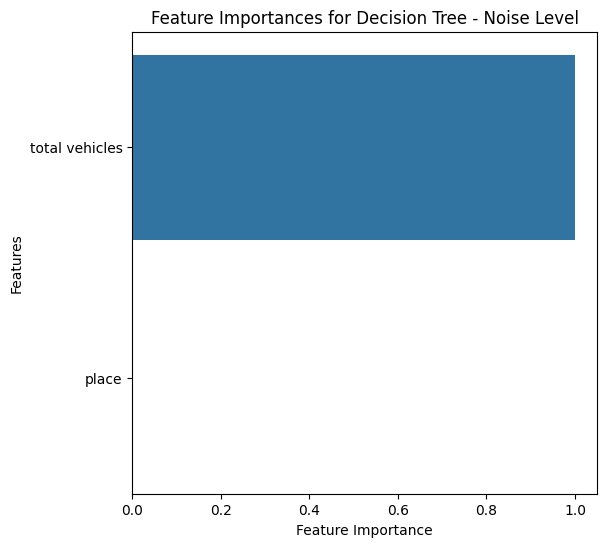

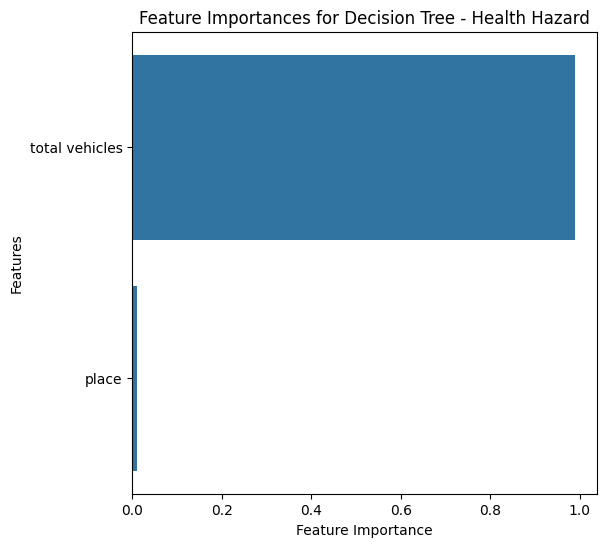

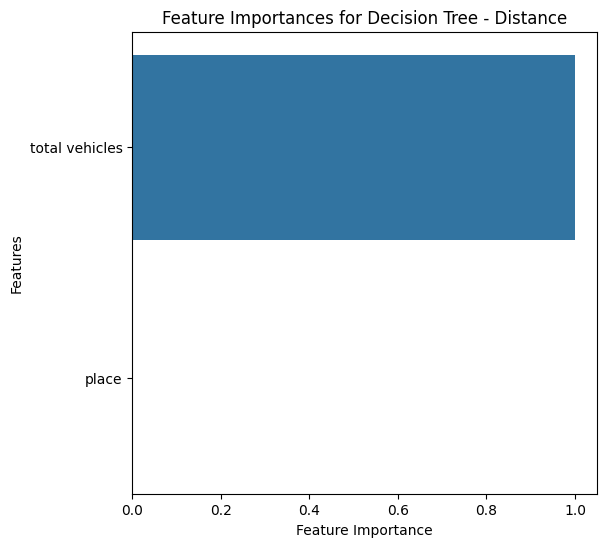

In [ ]:
# Plotting the feature importances for Decision Tree - Noise Level
plt.figure(figsize=(6, 6))
sns.barplot(x=dt_noise.feature_importances_, y=X.columns)
plt.title("Feature Importances for Decision Tree - Noise Level")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Plotting the feature importances for Decision Tree - Health Hazard
plt.figure(figsize=(6, 6))
sns.barplot(x=dt_hazard.feature_importances_, y=X.columns)
plt.title("Feature Importances for Decision Tree - Health Hazard")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Plotting the feature importances for Decision Tree - Distance
plt.figure(figsize=(6, 6))
sns.barplot(x=dt_distance.feature_importances_, y=X.columns)
plt.title("Feature Importances for Decision Tree - Distance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


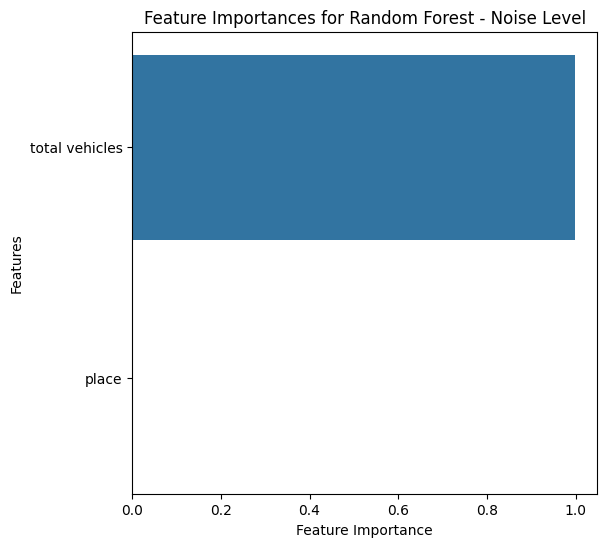

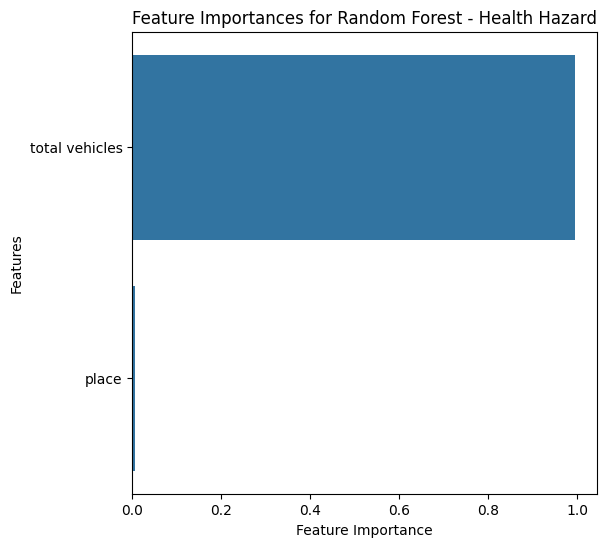

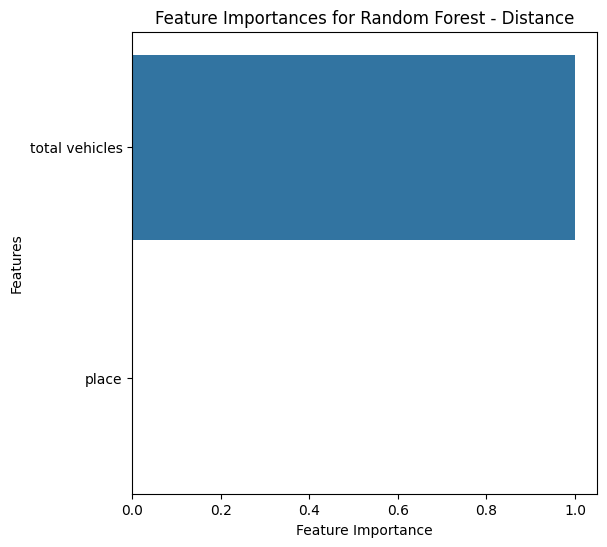

In [ ]:
# Plotting the feature importances for Random Forest - Noise Level
plt.figure(figsize=(6, 6))
sns.barplot(x=rf_noise.feature_importances_, y=X.columns)
plt.title("Feature Importances for Random Forest - Noise Level")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Plotting the feature importances for Random Forest - Health Hazard
plt.figure(figsize=(6, 6))
sns.barplot(x=rf_hazard.feature_importances_, y=X.columns)
plt.title("Feature Importances for Random Forest - Health Hazard")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Plotting the feature importances for Random Forest - Distance
plt.figure(figsize=(6, 6))
sns.barplot(x=rf_distance.feature_importances_, y=X.columns)
plt.title("Feature Importances for Random Forest - Distance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()
